In [ ]:
import pandas as pd
import numpy as np
import math
import copy
import seaborn as sns
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import csv
import statsmodels.formula.api as smf

In [ ]:
#datasets
real_possible_ranks = np.array([1, 101, 201, 301, 401, 501, 601, 701, 801, 901, 1001, 1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901, 2001, 2101, 2201, 2301, 2401, 2501, 2601, 2701, 2801, 2901, 3001, 3101, 3201, 3301, 3401, 3501, 3601, 3701, 3801, 3901, 4001, 4101, 4201, 4401, 4501, 4701, 4801, 4901, 5101, 5301, 5501, 5601, 5801, 6001, 6101, 6401, 6601, 6801, 6901, 7201, 7401,7601, 7901, 8101, 8301, 8601, 8801, 9101, 9401, 9701, 10001, 10201, 10601, 10901, 11201, 11501, 11901, 12201, 12601, 12901, 13301, 13701, 14101, 14501, 15001, 15401, 15801, 16301, 16801, 17301, 17801, 18301, 18901, 19401, 19901, 20501, 21101, 21601, 22301, 22901, 23601, 24201, 24801, 25501, 26201, 26801, 27501, 28301])
real_scores_set = np.array([314,236,221,209,199,192,186,182,177,173,170,167,163,161,159,156,153,151,149,147,148,146,144,143,141,140,138,137,136,134,133,132,131,129,128,127,126,125,124,123,122,121,120,119,118,117,116,115,114,113,112,111,110,109,108,107,106,105,104,103,102,101,100,99,98,97,96,95,94,93,92,91,90,89,88,87,86,85,84,83,82,81,80,79,78,77,76,75,74,73,72,71,70,69,68,67,66,65,64,63,62,61,60,59,58,57,56,55])
real_scores_set_2017 = np.array([339,305,295,289,284,])
possible_ranks = (max(real_possible_ranks) - real_possible_ranks)/max(real_possible_ranks)
scores_set = (max(real_scores_set) - real_scores_set)/ max(real_scores_set)

In [ ]:
data = []
with open('rank_score.csv', 'w') as f:
  for i in range(len(real_possible_ranks)):
    data.append([real_possible_ranks[i], real_scores_set[i]])
  header = ["Rank", "Mark"]
  rows = data

  writer_obj = csv.writer(f)
  writer_obj.writerow(header)
  writer_obj.writerows(rows)

In [ ]:
# prompt: a csv file containing the data of ranks and scores in a JEE exam yeaer
df = pd.read_csv('rank_score.csv')
print(df)

      Rank  Mark
0        1   314
1      101   236
2      201   221
3      301   209
4      401   199
..     ...   ...
103  25501    59
104  26201    58
105  26801    57
106  27501    56
107  28301    55

[108 rows x 2 columns]


Since we have two continuous numerical columns/variables, we should use pearson coefficient for hypothesis testing.

In [ ]:
df.corr()

,Rank,Mark
Rank,1.000000,-0.822911
Mark,-0.822911,1.000000


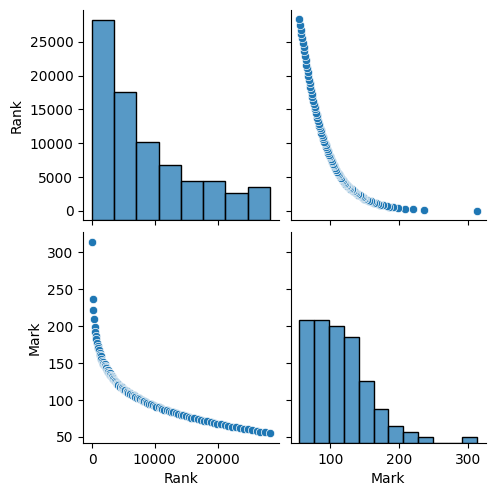

In [ ]:
sns.pairplot(df)

<Axes: xlabel='Mark', ylabel='Rank'>

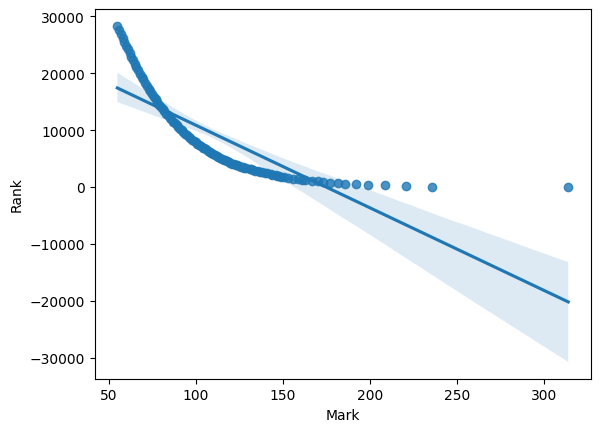

In [ ]:
sns.regplot(x="Mark", y = "Rank", data=df)

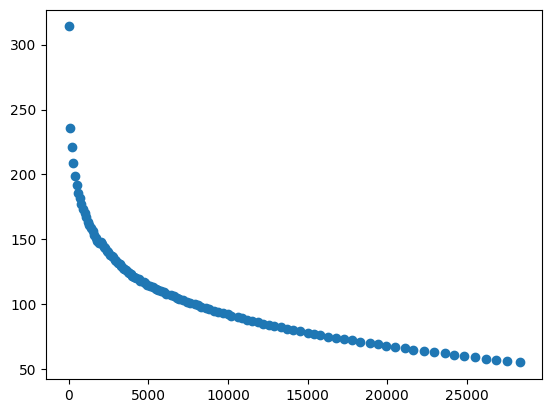

In [ ]:
plt.scatter(df['Rank'], df['Mark'])

In [ ]:
#H0 -> There is no correlation between JEE_ADV Mark vs Rank

#H1 -> There is a correlation between JEE_ADV Mark vs Rank


#finding pearson Coefficient
pearson_coef, p_value = stats.pearsonr(df['Rank'], df['Mark'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is -0.8229106714924899  with a P-value of P = 8.826240230637984e-28


<b><h5>Since the p-value <= 0.05, we can approve alternate hypothesis to be true</h5></b>

We can now start with our regression model

In [ ]:
#model
b_0 = 71000
w_0 = [-1100,5.2,-0.009]
def compute_cost(x, y, w, b):

    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w[0]* (x[i]) + w[1]*(x[i])**2 + w[2]*(x[i])**3 + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost
cost = compute_cost(df['Mark'], df['Rank'],w_0,b_0)

def compute_gradient(x,y,w,b):
  m = x.shape[0]
  dj_dw_1 = 0
  dj_dw_2 = 0
  dj_dw_3 = 0
  dj_db = 0

  for i in range(m):
      f_wb = w[0]* (x[i]) + w[1]*(x[i])**2 + w[2]*(x[i])**3 + b
      dj_dw_1_i = (f_wb - y[i]) * x[i]
      dj_dw_2_i =(f_wb - y[i]) * x[i]**2
      dj_dw_3_i = (f_wb - y[i]) * x[i]**3
      dj_db_i = f_wb - y[i]
      dj_db += dj_db_i
      dj_dw_1 += dj_dw_1_i
      dj_dw_2 += dj_dw_2_i
      dj_dw_3 += dj_dw_3_i
  dj_dw_1 = dj_dw_1/m
  dj_dw_2 = dj_dw_2/m
  dj_dw_3 = dj_dw_3/m
  dj_db = dj_db/ m

  return dj_dw_1,dj_dw_2, dj_dw_3, dj_db

def gradient_descent(x,y,w_in,b_in,cost_function,gradient_function,alpha, num_iters):
   # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw_1, dj_dw_2,dj_dw_3, dj_db = gradient_function(x, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w[0] = w[0] - alpha * dj_dw_1
        w[1] = w[1] - beta * dj_dw_2
        w[2] = w[2] - gamma * dj_dw_3
        b = b - delta * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append(cost_function(x, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b
iterations = 10000
alpha = .7e-5
beta = 2e-14
gamma = 2e-14
delta = 2.5e-10
final = gradient_descent(df['Mark'],df['Rank'],w_0,b_0,compute_cost,compute_gradient,alpha, iterations)
w_f, b_f = final
print([w_f, b_f])



Iteration    0: Cost 10897689.72   
Iteration 1000: Cost 272574.32   
Iteration 2000: Cost 272574.06   
Iteration 3000: Cost 272573.80   
Iteration 4000: Cost 272573.53   
Iteration 5000: Cost 272573.27   
Iteration 6000: Cost 272573.01   
Iteration 7000: Cost 272572.74   
Iteration 8000: Cost 272572.48   
Iteration 9000: Cost 272572.22   
[[-1065.0943845183476, 5.200033573425672, -0.0080861995317073], 70999.99996126402]


In [ ]:
data = float(input('Enter your marks: '))
f = w_f[2]*data**3 + w_f[1]*data**2 + w_f[0]*data + b_f
print(f'rank is equal to {f}')

Enter your marks: 150
rank is equal to 945.6742660773598


<ipython-input-12-63ce1e12df18>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['Rank'], hist = False, color = 'b', label = "Actual Value")
<ipython-input-12-63ce1e12df18>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(w_f[2]*df['Mark']**3 + w_f[1]*df['Mark']**2 + w

<Axes: xlabel='Mark', ylabel='Density'>

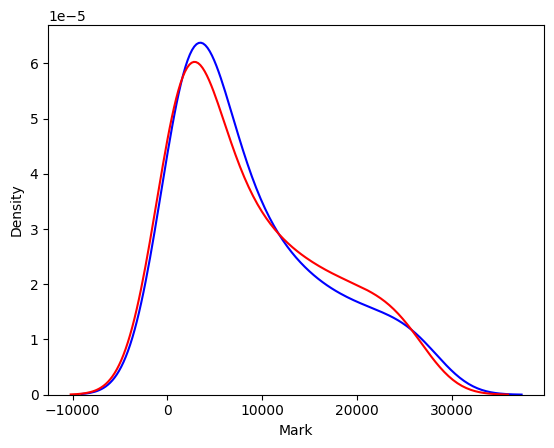

In [ ]:
#model visualization
ax1 = sns.distplot(df['Rank'], hist = False, color = 'b', label = "Actual Value")
sns.distplot(w_f[2]*df['Mark']**3 + w_f[1]*df['Mark']**2 + w_f[0]*df["Mark"] + b_f, hist = False, color = 'r', label = 'Predicted Value')

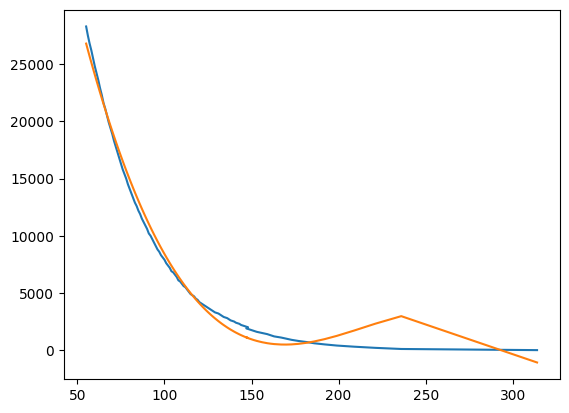

In [ ]:
plt.plot(df['Mark'], df['Rank'])
plt.plot(df['Mark'], w_f[2]*df['Mark']**3 + w_f[1]*df['Mark']**2 + w_f[0]*df["Mark"] + b_f)